# imports 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import sys
#print(f"Running Python: {sys.executable}")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# get data

In [6]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [7]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA
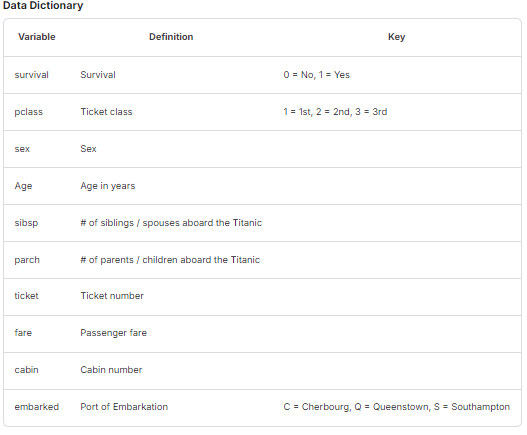

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Data:
Age         177
Cabin       687
Embarked      2
dtype: int64

Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.00000

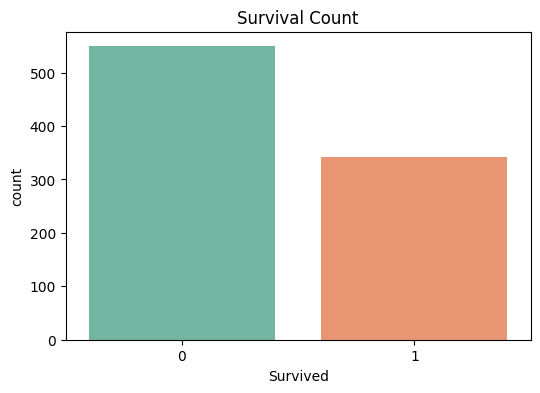

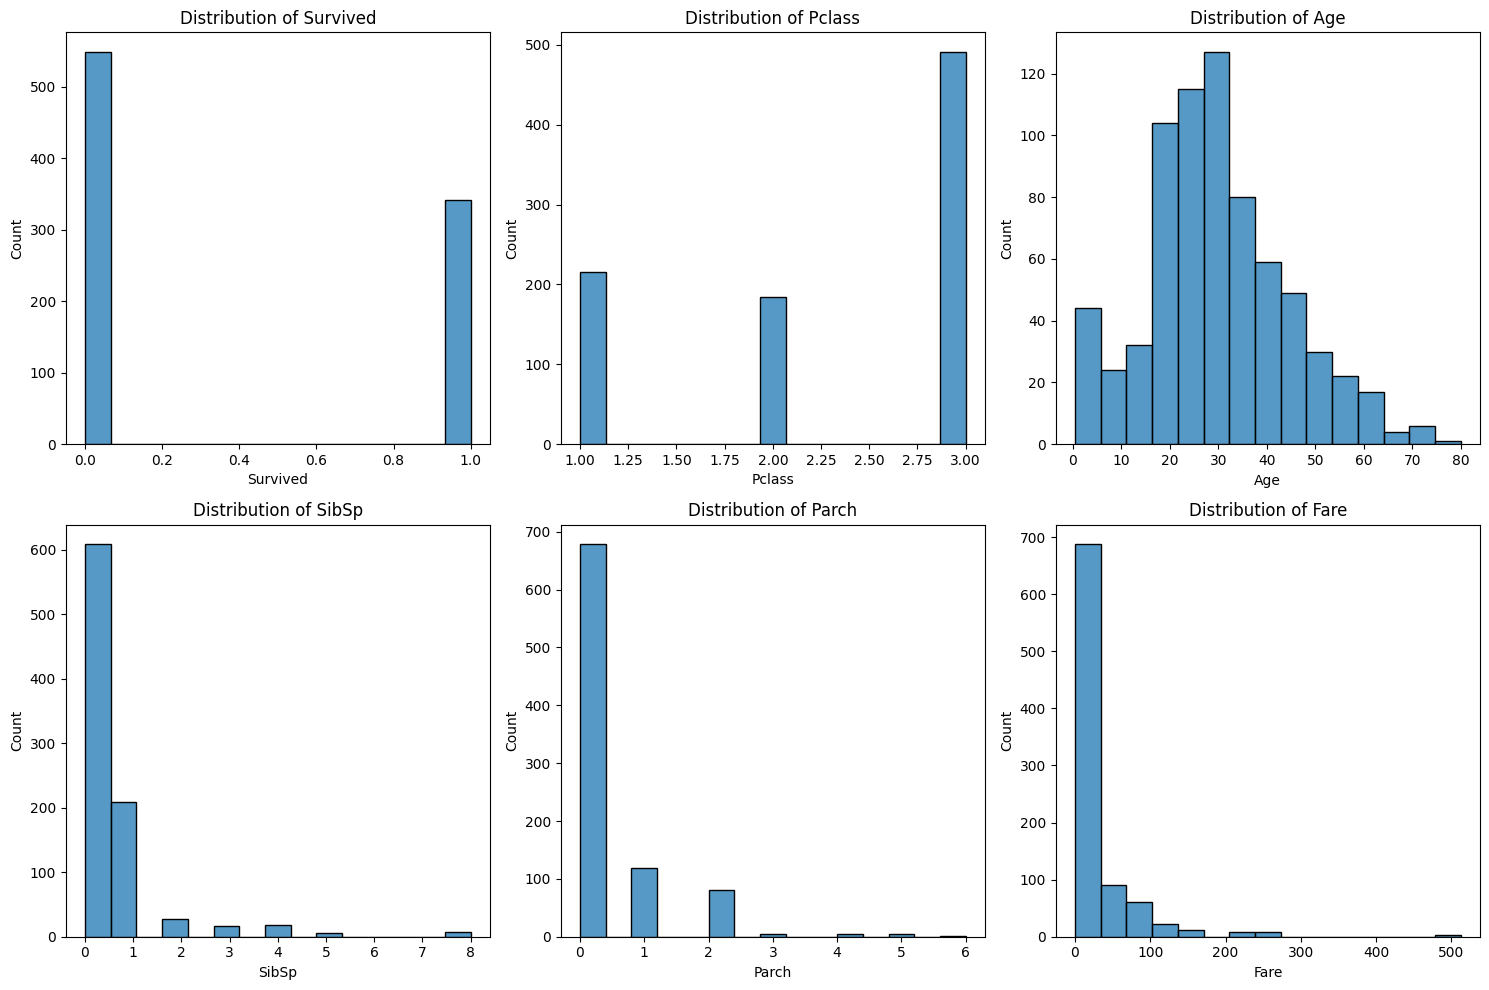

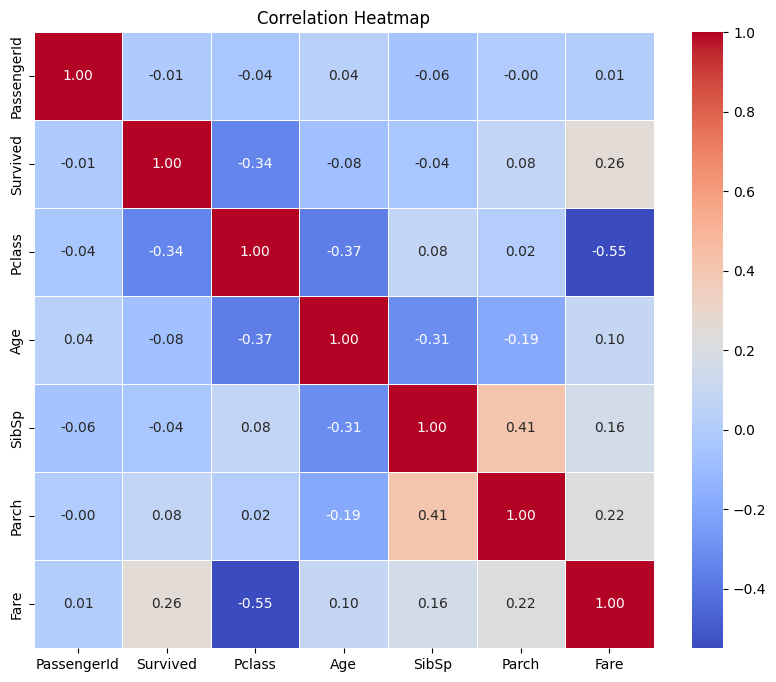

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


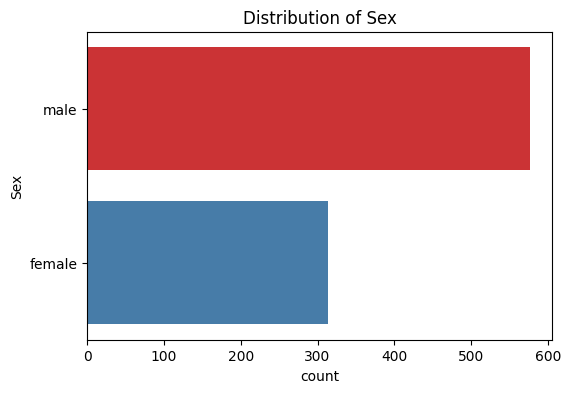

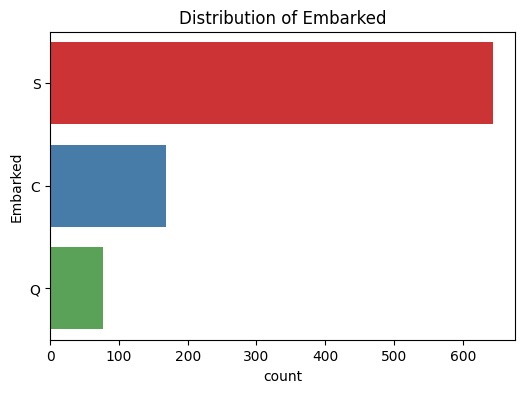

In [8]:
def eda_summary(data: pd.DataFrame):
    """
    Perform exploratory data analysis (EDA) on a dataset.

    Parameters:
    data (pd.DataFrame): The dataset to analyze.
    
    Returns:
    None: Displays plots and prints summary information.
    """
    # Dataset overview
    print("Data Overview:")
    print(data.info())
    
    # Missing data
    print("\nMissing Data:")
    print(data.isnull().sum()[data.isnull().sum() > 0])

    # Descriptive statistics
    print("\nDescriptive Statistics:")
    print(data.describe())

    # Survival count
    if 'Survived' in data.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x='Survived', data=data, palette='Set2')
        plt.title("Survival Count")
        plt.show()

    # Distribution of numerical variables
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop("PassengerId") #select num var and remove PassengerId
    num_plots = len(num_cols)
    
    # Dynamically determine layout size
    cols = 3  # Number of columns for subplots
    rows = math.ceil(num_plots / cols)  # Calculate number of rows based on the number of plots
    
    plt.figure(figsize=(15, 5 * rows))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(data[col], bins=15, kde=False)
        plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

    # Correlation heatmap (only for numeric columns)
    numeric_data = data.select_dtypes(include=['int64', 'float64'])
    if not numeric_data.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()

    # Categorical feature distributions
    cat_cols = data.select_dtypes(include=['object']).columns
    print(cat_cols)
    cat_cols = [item for item in cat_cols if item not in ["Name","Ticket","Cabin"]]
    for col in cat_cols:
        plt.figure(figsize=(6,4))
        sns.countplot(y=col, data=data, palette='Set1')
        plt.title(f'Distribution of {col}')
        plt.show()

# Usage:
eda_summary(train_data)